# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ftthalmhdi/hotel-booking/refs/heads/main/Dataset_inisiasi.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
print("Jumlah baris dalam dataset:", df.shape[0])
print("Jumlah kolom dalam dataset:", df.shape[1])

Jumlah baris dalam dataset: 119390
Jumlah kolom dalam dataset: 32


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Eksplorasi Data
print("\nInformasi dataset:")
print(df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 

In [5]:
print(df.describe())

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [6]:
print("\n Cek Missing Values")
print(df.isnull().sum())


 Cek Missing Values
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              1

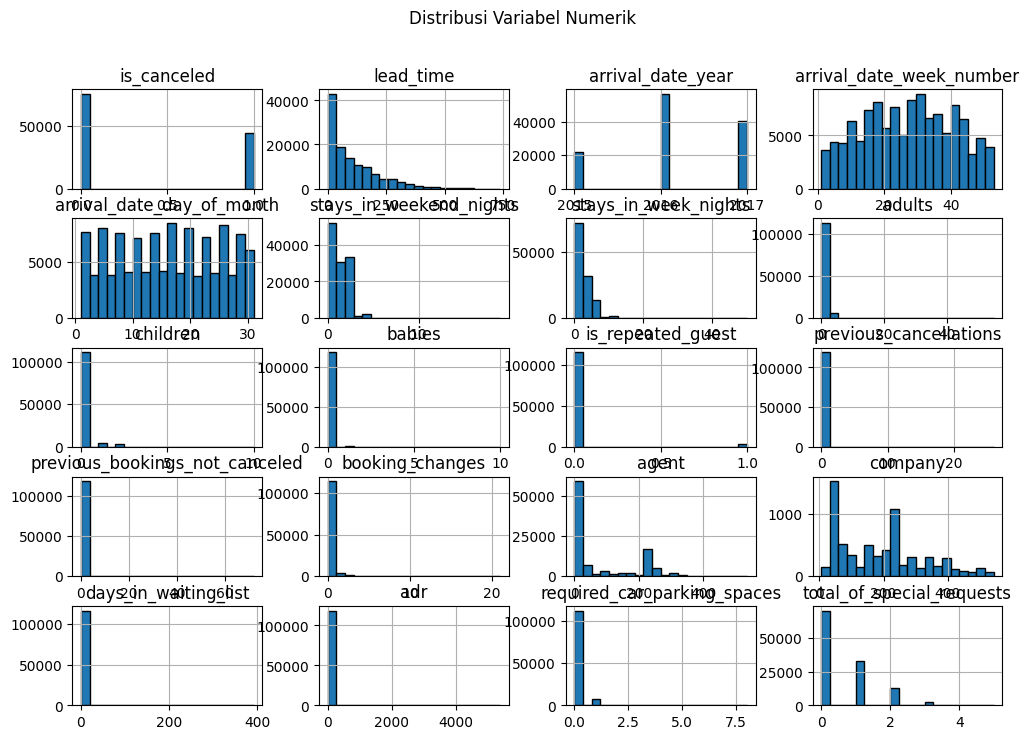

In [7]:
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribusi Variabel Numerik")
plt.show()

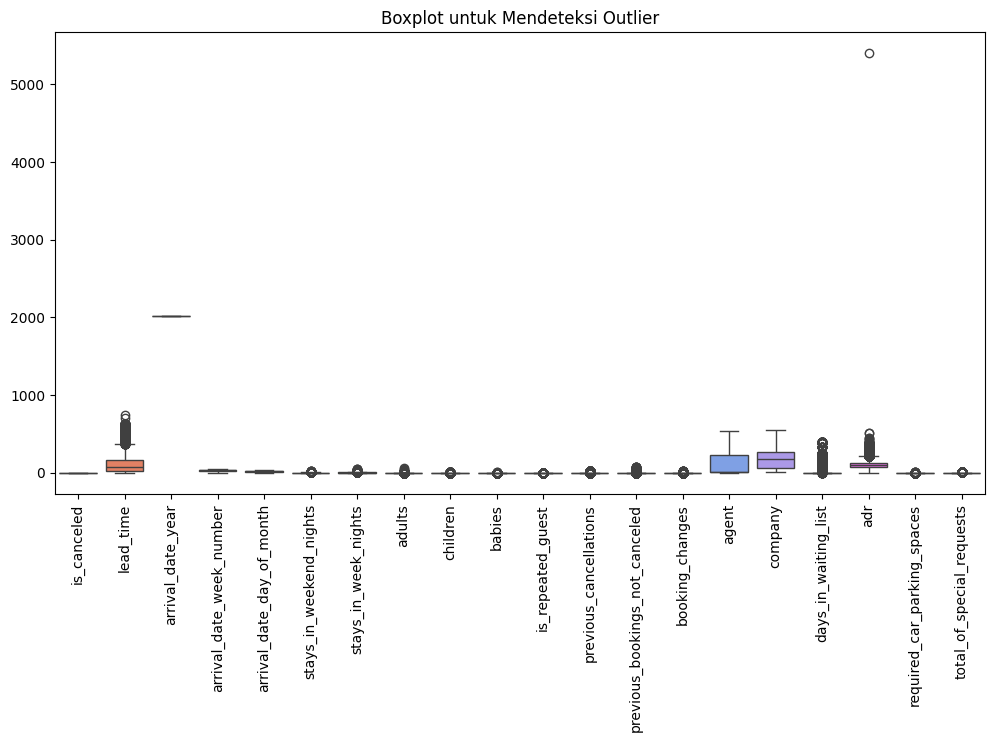

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot untuk Mendeteksi Outlier")
plt.xticks(rotation=90)
plt.show()

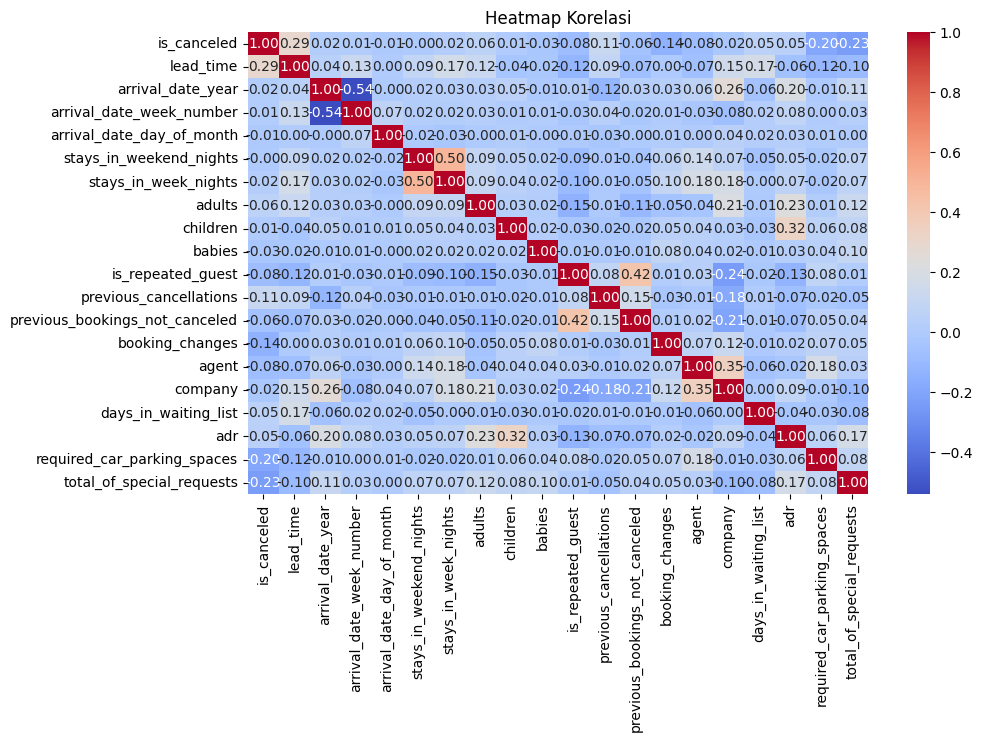

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt='.2f') # Select only numeric columns for correlation
plt.title("Heatmap Korelasi")
plt.show()


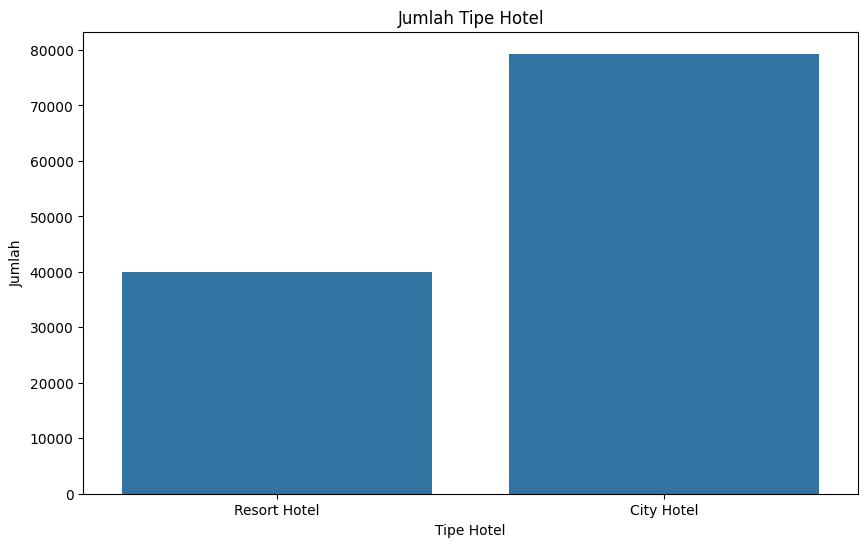

(119390, 32)

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel')
plt.title('Jumlah Tipe Hotel')
plt.xlabel('Tipe Hotel')
plt.ylabel('Jumlah')
plt.show()
df.shape

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [11]:
df = df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

In [13]:
print('\nNilai Hilang sebelum preprocessing:')
print(df.isnull().sum())
df.drop(columns=['company', 'agent', 'reservation_status', 'reservation_status_date'], inplace=True)
df.dropna(inplace=True)
print('\nNilai Hilang setelah preprocessing:')
print(df.isnull().sum())


Nilai Hilang sebelum preprocessing:
hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
com

<ipython-input-13-96a24c123a1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['company', 'agent', 'reservation_status', 'reservation_status_date'], inplace=True)


In [14]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

scaler = StandardScaler()
df_scaled_numerical = scaler.fit_transform(df[numerical_cols])
df_preprocessed = np.hstack((df_scaled_numerical, df[categorical_cols].values))
print('\nBentuk data setelah preprocessing:', df_preprocessed.shape)


Bentuk data setelah preprocessing: (86940, 28)


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [15]:
range_n_clusters = list(range(2, 11))

silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_preprocessed)
    silhouette_avg = silhouette_score(df_preprocessed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, rata-rata silhouette_score adalah: {silhouette_avg:.4f}")

Untuk n_clusters = 2, rata-rata silhouette_score adalah: 0.7684
Untuk n_clusters = 3, rata-rata silhouette_score adalah: 0.5901
Untuk n_clusters = 4, rata-rata silhouette_score adalah: 0.6401
Untuk n_clusters = 5, rata-rata silhouette_score adalah: 0.5693
Untuk n_clusters = 6, rata-rata silhouette_score adalah: 0.5305
Untuk n_clusters = 7, rata-rata silhouette_score adalah: 0.3414
Untuk n_clusters = 8, rata-rata silhouette_score adalah: 0.2994
Untuk n_clusters = 9, rata-rata silhouette_score adalah: 0.2715
Untuk n_clusters = 10, rata-rata silhouette_score adalah: 0.2423


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

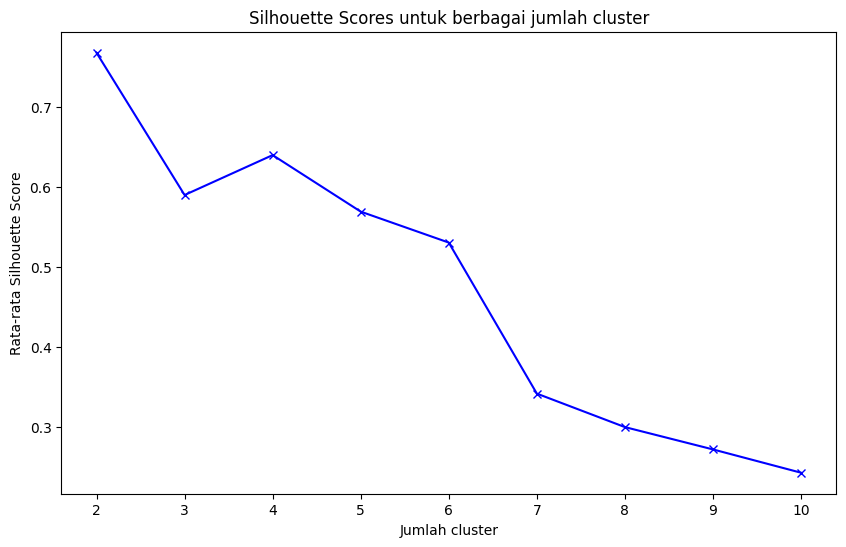


Jumlah cluster optimal: 2 dengan silhouette score: 0.7684


In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, 'bx-')
plt.xlabel('Jumlah cluster')
plt.ylabel('Rata-rata Silhouette Score')
plt.title('Silhouette Scores untuk berbagai jumlah cluster')
plt.show()

optimal_n_clusters = None
for n_clusters, score in zip(range_n_clusters, silhouette_scores):
    if score >= 0.70:
        optimal_n_clusters = n_clusters
        break

if optimal_n_clusters:
    print(f"\nJumlah cluster optimal: {optimal_n_clusters} dengan silhouette score: {score:.4f}")

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [20]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

silhouette_scores_pca = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    silhouette_scores_pca.append(silhouette_avg)
    print(f"Untuk n_clusters = {n_clusters}, rata-rata silhouette_score setelah PCA adalah: {silhouette_avg:.4f}")

Untuk n_clusters = 2, rata-rata silhouette_score setelah PCA adalah: 0.7994
Untuk n_clusters = 3, rata-rata silhouette_score setelah PCA adalah: 0.6543
Untuk n_clusters = 4, rata-rata silhouette_score setelah PCA adalah: 0.7218
Untuk n_clusters = 5, rata-rata silhouette_score setelah PCA adalah: 0.6741
Untuk n_clusters = 6, rata-rata silhouette_score setelah PCA adalah: 0.6622
Untuk n_clusters = 7, rata-rata silhouette_score setelah PCA adalah: 0.5278
Untuk n_clusters = 8, rata-rata silhouette_score setelah PCA adalah: 0.5686
Untuk n_clusters = 9, rata-rata silhouette_score setelah PCA adalah: 0.5450
Untuk n_clusters = 10, rata-rata silhouette_score setelah PCA adalah: 0.5192


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

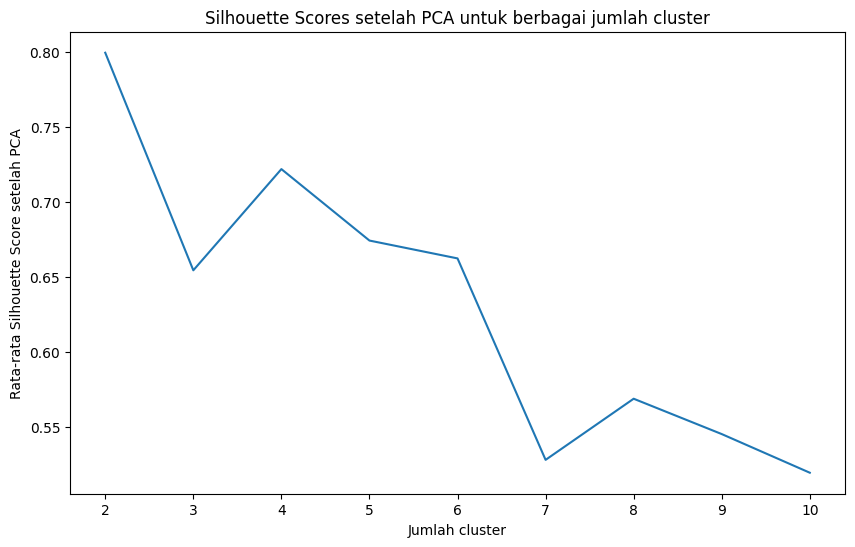


Jumlah cluster optimal setelah PCA: 2 dengan silhouette score: 0.7994


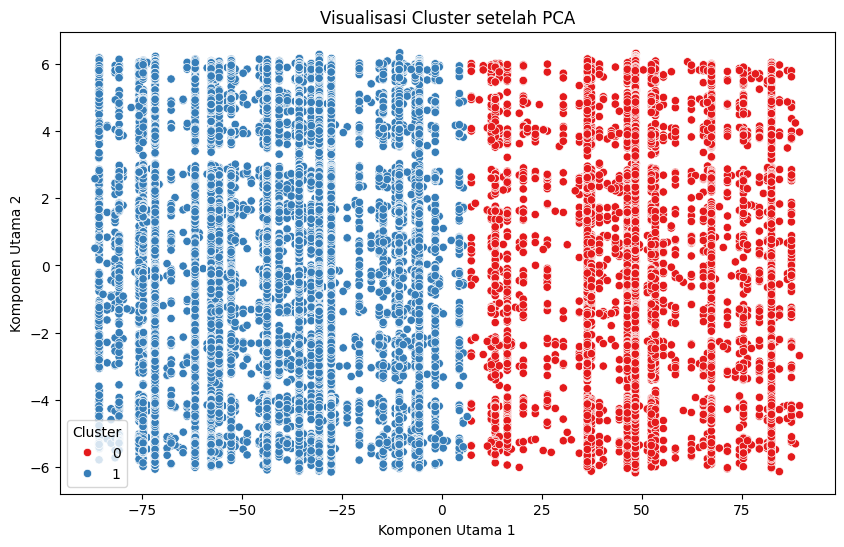

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores_pca)
plt.xlabel('Jumlah cluster')
plt.ylabel('Rata-rata Silhouette Score setelah PCA')
plt.title('Silhouette Scores setelah PCA untuk berbagai jumlah cluster')
plt.show()

optimal_n_clusters_pca = None
for n_clusters, score in zip(range_n_clusters, silhouette_scores_pca):
    if score >= 0.70:
        optimal_n_clusters_pca = n_clusters
        break

if optimal_n_clusters_pca:
    print(f"\nJumlah cluster optimal setelah PCA: {optimal_n_clusters_pca} dengan silhouette score: {score:.4f}")

kmeans = KMeans(n_clusters=optimal_n_clusters_pca, random_state=42)
cluster_labels = kmeans.fit_predict(df_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=cluster_labels, palette='Set1')
plt.title('Visualisasi Cluster setelah PCA')
plt.xlabel('Komponen Utama 1')
plt.ylabel('Komponen Utama 2')
plt.legend(title='Cluster')
plt.show()

In [22]:
cluster_labels

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [23]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_pca)

In [24]:
df_original = df.copy()

In [25]:
df_original.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,Cluster
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,2,0.0,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,2,0.0,0,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,2,75.0,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,0,2,75.0,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,0,2,98.0,0,1,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [26]:
original_numeric_features = df_original.select_dtypes(include=['number']).columns
original_numeric_features = original_numeric_features.drop("cluster", errors="ignore")  # Hindari error jika tidak ada
scaler = StandardScaler()
scaler.fit(df[original_numeric_features])

df[original_numeric_features] = scaler.inverse_transform(df[original_numeric_features])
df_original[original_numeric_features] = df[original_numeric_features]

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [27]:
df_original['Cluster'].value_counts()

,count
Cluster,
1.075622,50640
0.582471,36300


In [29]:

ddf.groupby("Cluster").mean()



NameError: name 'ddf' is not defined

In [28]:
df.groupby("Cluster").std()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
Cluster,,,,,,,,,,,,,,,,,,,,,
0.582471,0.242499,0.210614,7409.745759,0.490341,11.924859,190.668396,78.227387,1.035948,4.126991,0.489399,...,4.506448,3.407956,4.115573,0.536060,0.022676,117.537831,0.277030,3444.706975,0.085200,0.677925
1.075622,0.229534,0.189558,7337.703258,0.448386,12.130830,183.292186,77.913842,1.062133,4.166790,0.296818,...,0.460644,3.333822,3.826974,0.525782,0.010116,86.844519,0.284887,2654.635403,0.073335,0.699353


Tulis hasil interpretasinya di sini.
1. Cluster 0:
  
2. Cluster 1:


# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.